# Problem 1

## Exercises 1.2

### Question 1)

x and y could be represented by an SNN with 2 input neurons - 1 for x and 1 for y - that encode spikes using a mathematical model done on a millisecond time scale. The output would then depend upon which of the 2 neurons would record a spike in a given millisecond. For example, say at t=0 ms, neurons x and y record no spikes - this means all 3 of the given logic functions would evaluate to 0. However, if both neurons fired at t = 10 ms, then AND & OR would evaluate to 1 at t = 10. Also, if say at t = 15, x were to fire and y did not, then functions OR & XOR would evaluate to 1.

### Question 2)
The same approach as above could be utilized, only instead of encoding by time, the firing rate over a given epoch for x and y could be recorded and compared. For example, if neurons x and y exhibit the same firing rate, then the AND function could evaluate to 1.

### Question 3) Single-Layer SNN: AND

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Function Definitions

In [2]:
def LIF(I, Cm, Rm):
    """
    Runs a LIF simulation on neuron and returns outputted voltage

            Parameters:
                    I (double[]): A list of input voltages in mV
                    Cm (double): The membrane capacitance
                    Rm (double): The membrane resistance

            Returns:
                    V (double[]): A list of the output voltages in mV
    """
    V_thresh = 30
    V_rest = -65
    V_spike = 80
    dT = 0.02  # time step in ms
    total_time = (I.size) * dT

    # an array of time
    time = np.arange(0, total_time, dT)

    # default voltage list set to resting volatage of -65mV
    V = (-65) * np.ones(len(time))
    #V_bin = 0*np.ones(len(time))

    did_spike = False

    # function member variable to track spikes
    LIF.spikes = 0

    for t in range(len(time)):
        # using "I - V(t)/Rm = Cm * dV/dT"
        dV = (I[t] - (V[t - 1] - V_rest) / Rm) / Cm

        # reset membrane potential if neuron spiked last tick
        if did_spike:
            V[t] = V_rest + dV * dT
        else:
            V[t] = V[t - 1] + dV * dT

        # check if membrane voltage exceeded threshold (spike)
        if V[t] > V_thresh:
            did_spike = True
            #V_bin[t] = 80
            # set the last step to spike value
            V[t] = V_spike
            LIF.spikes += 1
        else:
            did_spike = False

    return V

def generateSpikeRates(input):
    
    """
    Generates resulting spike rates for all timesteps in a time frame given input current injected in that time frame
    Parameters:
        input: Array of inputs at timesteps t
    Returns:
        spike_rate: Array of spiking rates at timesteps t
    """
    t = 100
    dT = 1
    time = np.arange(0, T + dT, dT)
    
    spike_rate = np.empty(input.size)
    for i in range(input.size):
        """calculate spike rate for each iteration"""

        I = np.zeros(len(time))
        I[0:len(time)] = input[i]

        # run LIF simulation
        LIF(I=I, Cm=4, Rm=5)

        # calculate the spike rate during the 20ms to 80ms period
        spike_rate[i] = LIF.spikes / (time[len(time)-1] - time[0] ) * 1000
        
    return spike_rate
    
def isSpiking(V):
    """
    Records where spikes exist in a neuron given voltages
    """
    x = np.zeros(len(V))
    for i in range(len(V)):
        if V[i] > 30:
            x[i] = 80        
    return x     

### Inputs

In [3]:
#time frame we are assessing
total_time = 100
dT = 0.02
time = np.arange(0, total_time + dT, dT)

#representations of the input current delivered to our input neurons x and y
x = np.zeros(len(time))
y = np.zeros(len(time))
x[1000:3000] = 100
y[1000:4500] = 100
x[4000:5000] = 100

### LIF Demonstration

Text(0.5, 0, 'Time (ms)')

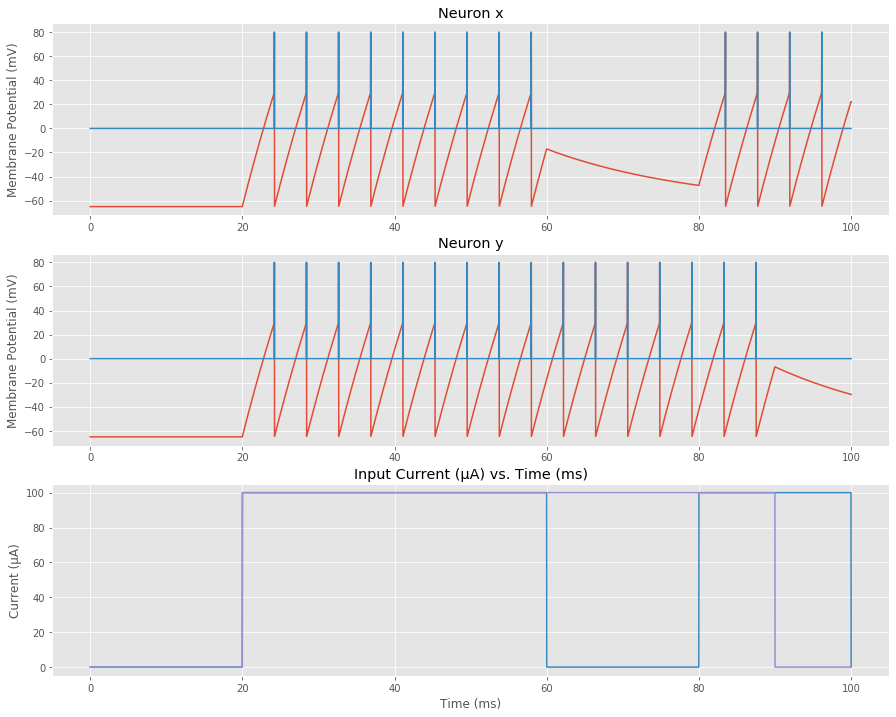

In [4]:
#simulations of voltage output from LIF model for neurons x and y.
V_x = LIF(I=x, Cm=4, Rm=5)
V_y = LIF(I=y, Cm=4, Rm=5)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

ax1.plot(time, V_x, label="Membrane Potential")
#ax1.plot(time, V_x_bin, label="Spikes")
ax1.plot(time, isSpiking(V_x), label="Spiking")
ax1.set_title("Neuron x")
ax1.set_ylabel("Membrane Potential (mV)")


ax2.plot(time, V_y, label="Membrane Potential")
#ax2.plot(time, V_y_bin, label="Membrane Potential")
ax2.plot(time, isSpiking(V_y), label="Membrane Potential")
ax2.set_title("Neuron y")
ax2.set_ylabel("Membrane Potential (mV)")


ax3.plot(time, x, "C1", label="Input Current (x)")
ax3.plot(time, y, "C2", label = "Input Current (y)")
ax3.set_title("Input Current (µA) vs. Time (ms)")
ax3.set_ylabel("Current (µA)")
ax3.set_xlabel("Time (ms)")


### Encoding Input

In [5]:
#encodes x and y into rates generated from input current injected at each dT

x_out = generateSpikeRates(x)
y_out = generateSpikeRates(y)

x_out, y_out

(array([  0.,   0.,   0., ..., 230., 230.,   0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

### Training

Text(0, 0.5, 'Spikes')

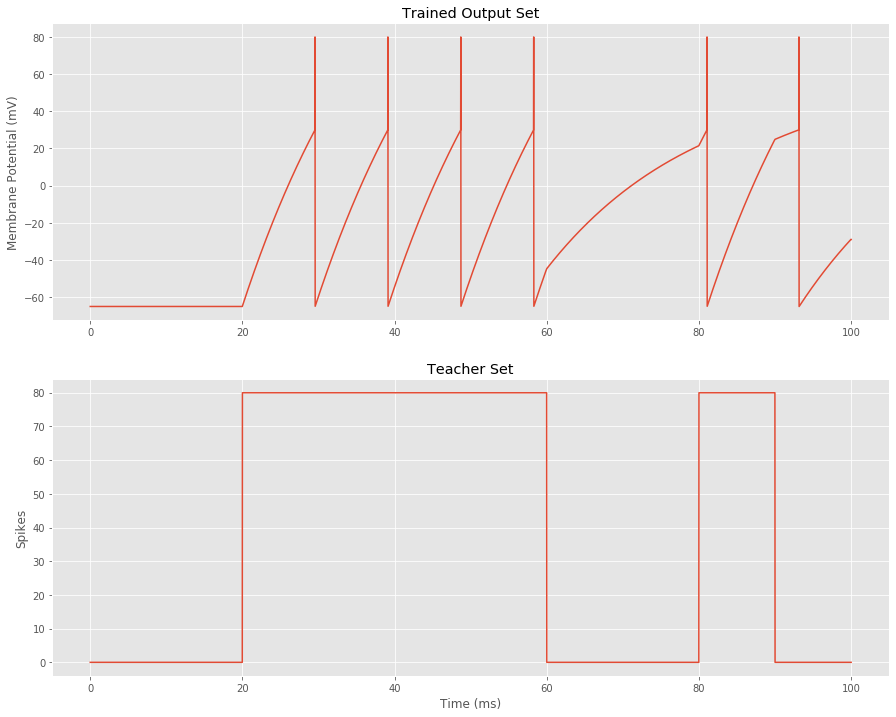

In [7]:
#teacher neuron meant to represent our target output (this part isnt done yet)
output_teacher = np.zeros(len(x))

for i in range(len(x)):
    if (x_out[i] > 0) and (y_out[i] > 0):
        output_teacher[i] = 80

#initialize weights of connections
#weights[0] = w_x,out; weights[1] = w_y,out
weights = np.array([[25],[25]])

#training (also isn't done bc it doesn't learn)
o_neuron_input = np.zeros(len(x))

for epoch in range(100):
    for t in range(len(time)):
        o_neuron_input[t] = (x_out[t]>0)*weights[0] + (y_out[t]>0)*weights[1]
    o_neuron_output = LIF(I=o_neuron_input, Cm=4, Rm=5)

#plotting our training data
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))

ax1.plot(time, o_neuron_output, label = "Trained Output Set")
ax1.set_title("Trained Output Set")
ax1.set_ylabel("Membrane Potential (mV)")

ax2.plot(time, output_teacher, label = "Teacher Set")
ax2.set_title("Teacher Set")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Spikes")  